# <strong> Simple Visualization of the Regression Line </strong>

## Importing the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_openml(name="house_prices", as_frame=True, parser="auto")

In [3]:
housing_df = housing.data
housing_df["target"] = housing.target

In [4]:
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Choosing X and y

In [5]:
df = housing_df[["LotArea", "target"]]

In [6]:
X = df["LotArea"].values
y = df["target"].values

## Plotting the data

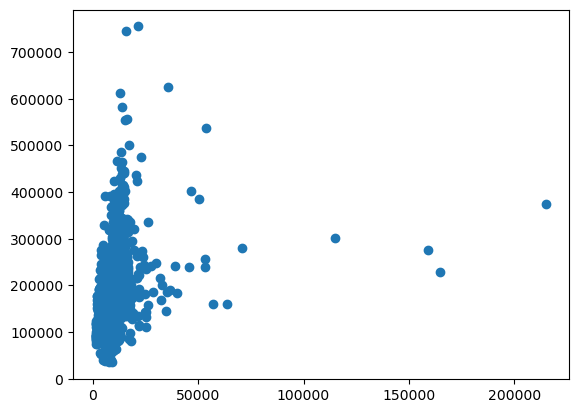

In [7]:
plt.scatter(df["LotArea"], df["target"])

In [8]:
df.shape

(1460, 2)

## Plottin the regression line with numpy

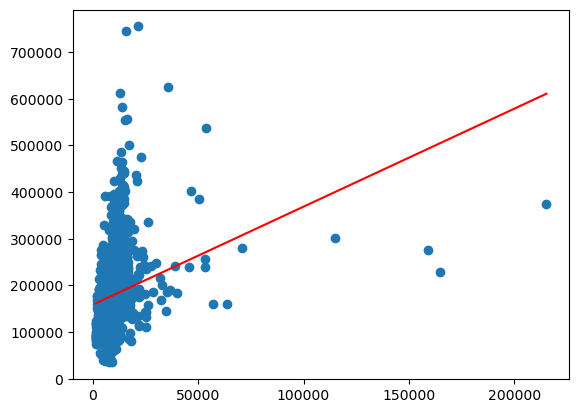

In [9]:
plt.scatter(X, y)
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color="red")
# https://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python

## Data preparation for the regression line with sklearn

In [10]:
X = X.reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Fitting the regression line

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.score(X_test, y_test)

0.07923143765942864

In [15]:
lr.coef_

array([1.86853106])

## Plotting the regression line

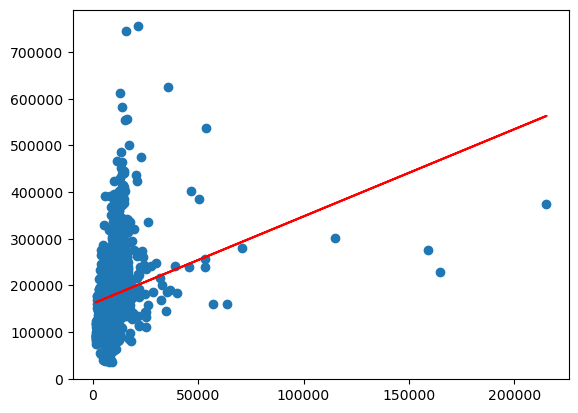

In [16]:
plt.scatter(X, y)
# plotting the best fit line using the coefficients of the linear regression model
plt.plot(X, lr.coef_ * X + lr.intercept_, color="red")

## Repeating the process without the outliers

In [17]:
# doing the same process as above this time eliminating the outliers
df = df[df["LotArea"] < 50000]

X = df["LotArea"].values
y = df["target"].values

X = X.reshape(-1, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.score(X_test, y_test)

0.19704680549019993

In [21]:
lr.coef_

array([6.15757734])

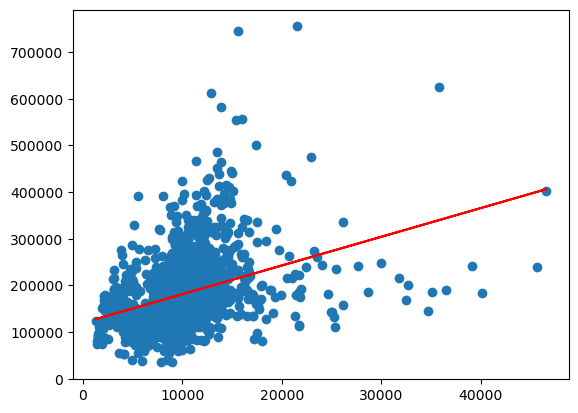

In [22]:
plt.scatter(X, y)
# plotting the best fit line using the coefficients of the linear regression model
plt.plot(X, lr.coef_ * X + lr.intercept_, color="red")